# Exercícios

__1)__ Utilizando o _dataset_ para a classificação de casas em Paris, com as seguintes características dos dados:

- squareMeters - quantidade de metros quadrados;
- numberOfRooms - quantidade de quartos;
- hasYard - se têm ou não quintal;
- hasPool - se tem ou não piscina;
- floors - número de andares;
- cityCode - CEP;
- cityPartRange - quanto maior o valor mais exclusivo é a vizinhança;
- numPrevOwners - quantidade de donos anteriores;
- made - ano da fabricação;
- isNewBuilt - se é um imóvel novo;
- hasStormProtector - se têm proteção contra chuva;
- basement - tamanho do porão;
- attic - tamanho do sotão;
- garage - tamanho da garagem;
- hasStorageRoom - se têm ou não despensa;
- hasGuestRoom - número de quartos de hóspedes;
- price - preço da casa;
- category - marcação se a casa é luxuosa `Luxury` ou uma casa básica `Basic`.

A partir da descrição dos dados desenvolva os tópicos a seguir:

__A)__ Faça uma EDA para conhecer as características dos dados (façam gráficos, análise de correlações e etc.)

__B)__ Faça um modelo de Regressão onde a variável resposta será o preço dos imóveis. Teste os diferentes modelos vistos durante o curso. Avalie a importância dos atributos, se a variável `price` influência na resposta final do modelo e o quanto que impacta.

## 

__2)__ Utilizando o _dataset_ para a classificação de casas em Paris, com as seguintes características dos dados:

- squareMeters - quantidade de metros quadrados;
- numberOfRooms - quantidade de quartos;
- hasYard - se têm ou não quintal;
- hasPool - se tem ou não piscina;
- floors - número de andares;
- cityCode - CEP;
- cityPartRange - quanto maior o valor mais exclusivo é a vizinhança;
- numPrevOwners - quantidade de donos anteriores;
- made - ano da fabricação;
- isNewBuilt - se é um imóvel novo;
- hasStormProtector - se têm proteção contra chuva;
- basement - tamanho do porão;
- attic - tamanho do sotão;
- garage - tamanho da garagem;
- hasStorageRoom - se têm ou não despensa;
- hasGuestRoom - número de quartos de hóspedes;
- price - preço da casa;
- category - marcação se a casa é luxuosa `Luxury` ou uma casa básica `Basic`.

A partir da descrição dos dados desenvolva os tópicos a seguir:

__A)__ Faça uma EDA para conhecer as características dos dados (façam gráficos, análise de correlações e etc.)

__B)__ Avalie inicialmente as variáveis categóricas utilizando o Qui-Quadrado e o ANOVa. Busque entender se todas as variáveis categóricas são relevantes para a variável `category`. Desenvolva uma modelo de Regressão Logística e avalie o resultado do modelo e o impacto da variável `price` no desempenho do modelo.

## 

__3)__ A partir do _dataset_ sobre caranguejos, utilize um modelo de regressão para predizer a idade dos caranguejos. Faça uma EDA para conhecer os dados, desenvolva os modelos de Regressão apresentados em aula e faça uma análise da importância das variáveis.

In [1]:
# Importando as bibliotecas que poderão ser utlizadas ao longo do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
crab = pd.read_csv("../datasets/CrabAgePrediction.csv")
crab.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [4]:
crab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [5]:
crab.duplicated().sum()

0

In [6]:
crab["Sex"].value_counts()

M    1435
I    1233
F    1225
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

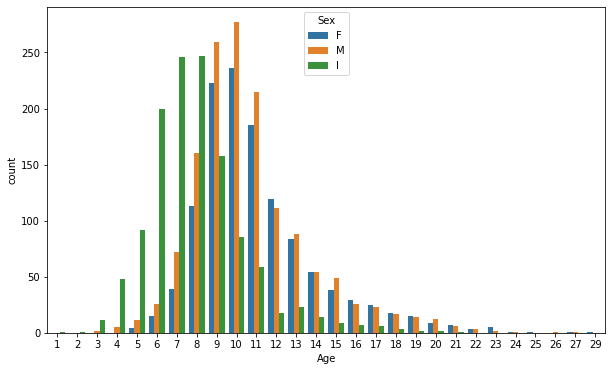

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age', data = crab, hue= "Sex")

In [8]:
crab[crab["Sex"]=="M"].mean()

Length             1.403946
Diameter           1.098563
Height             0.378537
Weight            28.094957
Shucked Weight    12.243240
Viscera Weight     6.109880
Shell Weight       7.993621
Age               10.723345
dtype: float64

In [9]:
crab_dummies = pd.get_dummies(crab, prefix_sep="_", columns=["Sex"], drop_first=True)
crab_dummies.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,0,0
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,0,1
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,1,0
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,0,0
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,1,0


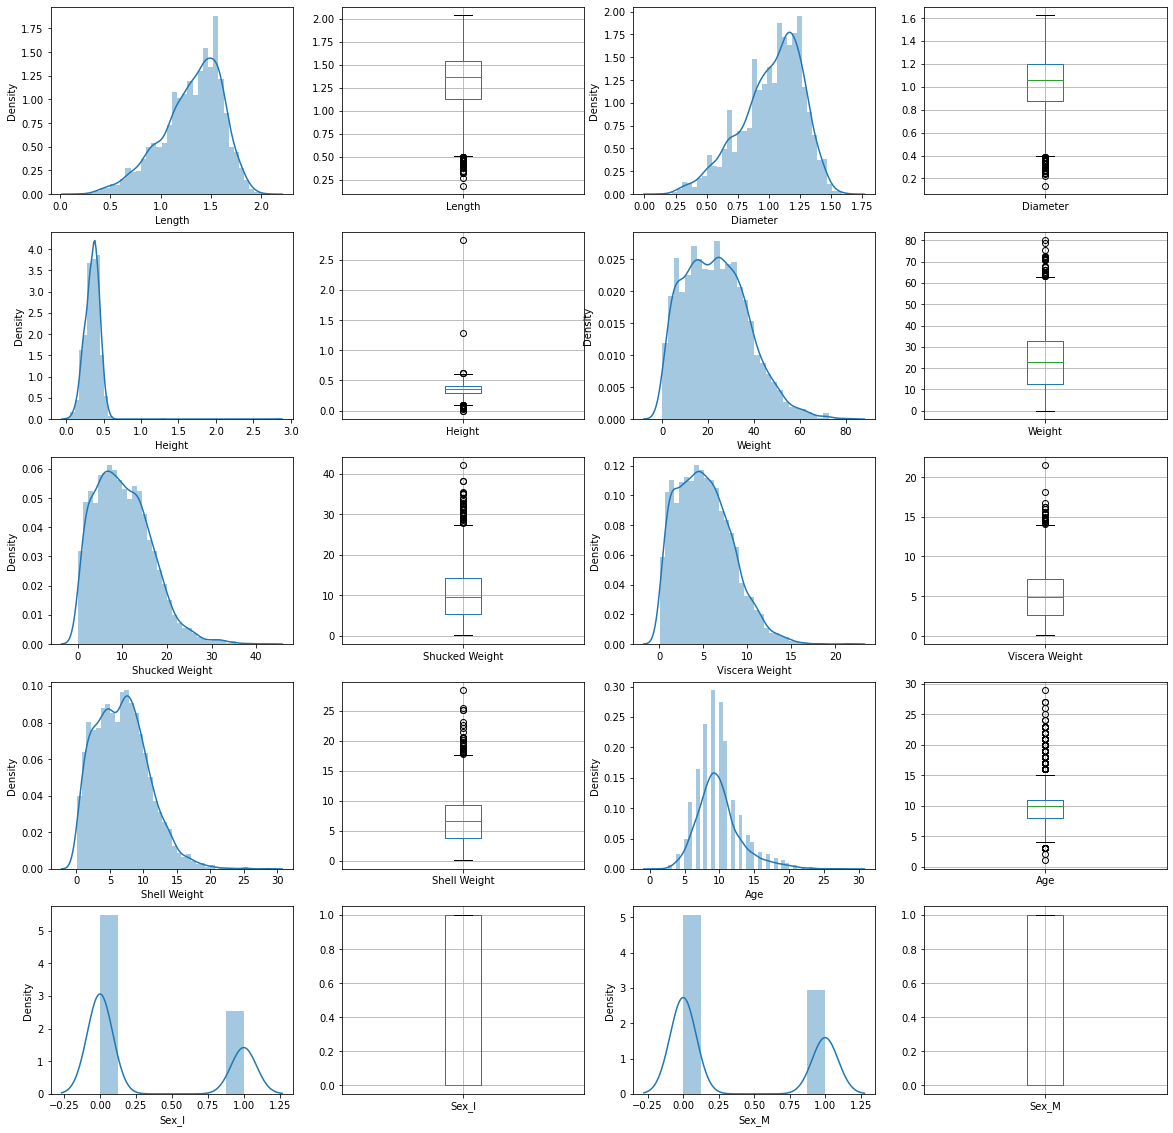

In [10]:
fig, ax = plt.subplots(5, 4, figsize=(20, 20))
ax = ax.flatten()
columns = crab_dummies.columns

for i, col in enumerate(columns):
    sns.distplot(crab_dummies[col], ax=ax[i+i])
    crab_dummies.boxplot(col, ax=ax[i+1+i])
    #print()
plt.show()

<AxesSubplot:>

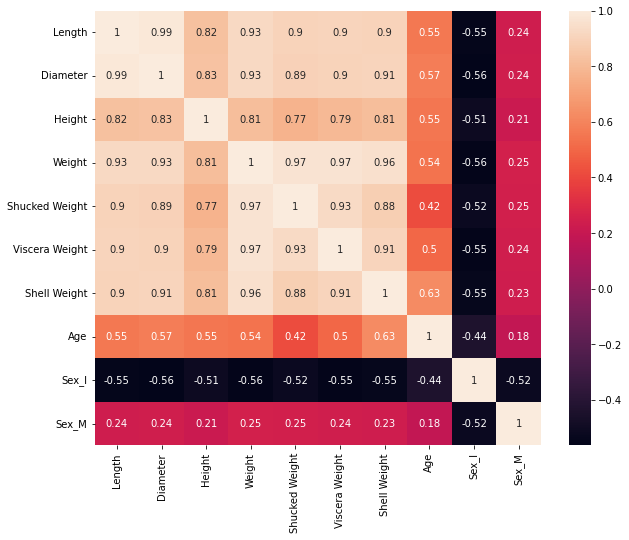

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(crab_dummies.corr(), annot=True)

In [12]:
crab.groupby(by="Sex").size().reset_index()

,Sex,0
0,F,1225
1,I,1233
2,M,1435


In [58]:
# Separa no X e y
X = crab_dummies.drop(["Length", "Age"], axis=1)
y = crab_dummies["Age"]

# separa a base em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# instanciar a classe do StandardScaler
scaler = StandardScaler()

# Transformação dos dados
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [60]:
# Instancia o modelo
model = LinearRegression()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
model.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred = model.predict(X_test_std)

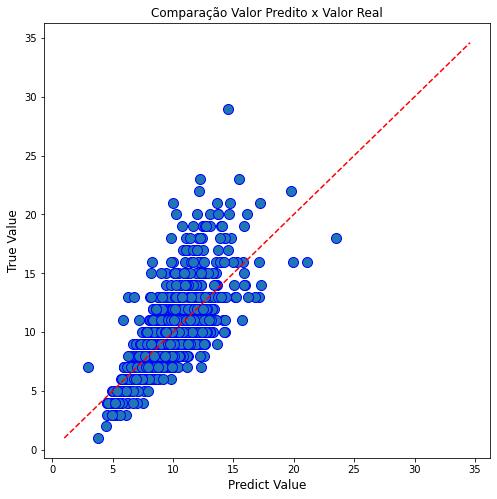

In [61]:
# Vamos criar um gráfico para comparar os Valores Reais com os Preditos
fig = plt.figure(figsize=(8,8))
l = plt.plot(y_pred, y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparação Valor Predito x Valor Real', fontsize=12)
plt.ylabel("True Value", fontsize=12)
plt.xlabel("Predict Value", fontsize=12)

# mostra os valores preditos e originais
xl = np.arange(min(y_test), 1.2*max(y_test),(max(y_test)-min(y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')
plt.show()

In [62]:
# Calcula o R2 score
R2 = r2_score(y_test, y_pred)

# Print do valor do R2
print("R2: ", R2)

R2:  0.5348299538158712


In [63]:
# Feature Importance - Regressão Linear
coefs = model.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)
    
dictionary = {"Features": list_feature,
              "Scores": list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=["Scores"], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,Weight,3.338037
1,Shell Weight,1.672318
2,Diameter,1.066888
3,Height,0.399709
4,Sex_M,0.011337
5,Sex_I,-0.411154
6,Viscera Weight,-0.912647
7,Shucked Weight,-3.965930


In [64]:
# Instancia o modelo
ridge = Ridge()

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
ridge.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_ridge = ridge.predict(X_test_std)

In [65]:
# Feature Importance - Ridge
coefs = ridge.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)
    
dictionary = {"Features": list_feature,
              "Scores": list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=["Scores"], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,Weight,3.172701
1,Shell Weight,1.726539
2,Diameter,1.063033
3,Height,0.400673
4,Sex_M,0.011429
5,Sex_I,-0.411948
6,Viscera Weight,-0.874215
7,Shucked Weight,-3.885830


In [66]:
# Instancia o modelo
lasso = Lasso(alpha=0.25)

# Fit dos dados (ou seja, vamos passar os dados para o modelo aprender com eles)
lasso.fit(X_train_std, y_train)

# Para os dados novos, vamos definir a predição para a base de teste
y_pred_lasso = lasso.predict(X_test_std)

In [67]:
# Feature Importance - Lasso
coefs = lasso.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)
    
dictionary = {"Features": list_feature,
              "Scores": list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=["Scores"], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,Shell Weight,1.538579
1,Height,0.149067
2,Diameter,0.000000
3,Weight,0.000000
4,Shucked Weight,-0.000000
5,Viscera Weight,-0.000000
6,Sex_M,0.000000
7,Sex_I,-0.253135


In [68]:
# Comparando os R2s
print("Resultados para R2 Score:")
print("R2 - Regressão Linear: ", np.round(r2_score(y_test, y_pred), 4))
print("R2 - Ridge: ", np.round(r2_score(y_test, y_pred_ridge), 4))
print("R2 - Lasso: ", np.round(r2_score(y_test, y_pred_lasso), 4))

Resultados para R2 Score:
R2 - Regressão Linear:  0.5348
R2 - Ridge:  0.5337
R2 - Lasso:  0.3911


## 

__4)__ Utilizando o _dataset_ sobre o câncer de mama `breast_cancer.csv`, resolva os itens abaixo:

__A)__ Realize uma análise exploratória dos dados para conhecer melhor o dataset;

__B)__ Utilizando o raio médio como variável resposta, desenvolva uma Regressão Linear para fazer a predição. Teste diferentes modelos que foram vistos em aula. Faz sentido um modelo de predição desta forma?

__C)__ Desenvolva um modelo de Regressão Logística para predizer se o câncer seria maligno ou benigno, utilizando a
comovariável resposta `diagnosis`